# Background fit 

For resonant background, we consider all possible Higgs production mechanisms: gluon-gluon129
fusion (ggH), vector-boson fusion (VBFH), associated production with a vector boson (VH), top130
quarks (ttH), and b-quarks (bbH) where Higgs decays into two photons.131

## ggJets

In [23]:
import uproot
import awkward as ak
from vector import Array as awk
import numpy as np

# Path to the ROOT file and tree
file_path_signal = "../../../output_root/v2_production/backgrounds/GGJets.root"
tree_name = "DiphotonTree/data_125_13TeV_NOTAG/"


# Load the ROOT file and extract variables
with uproot.open(file_path_signal) as file:
    tree = file[tree_name]
    
    # Extract b-jet variables
    lead_bjet_pt = tree["Res_lead_bjet_pt"].array(library="ak")    # Transverse momentum of leading b-jet
    lead_bjet_eta = tree["Res_lead_bjet_eta"].array(library="ak")  # Pseudorapidity of leading b-jet
    lead_bjet_phi = tree["Res_lead_bjet_phi"].array(library="ak")  # Azimuthal angle of leading b-jet
    lead_bjet_mass = tree["Res_lead_bjet_mass"].array(library="ak") # Mass of leading b-jet

    sublead_bjet_pt = tree["Res_sublead_bjet_pt"].array(library="ak")    # Transverse momentum of subleading b-jet
    sublead_bjet_eta = tree["Res_sublead_bjet_eta"].array(library="ak")  # Pseudorapidity of subleading b-jet
    sublead_bjet_phi = tree["Res_sublead_bjet_phi"].array(library="ak")  # Azimuthal angle of subleading b-jet
    sublead_bjet_mass = tree["Res_sublead_bjet_mass"].array(library="ak") # Mass of subleading b-jet

    # Extract dijet variables
    dijet_pt = tree["Res_dijet_pt"].array(library="ak")    # Transverse momentum of the dijet system
    dijet_eta = tree["Res_dijet_eta"].array(library="ak")  # Pseudorapidity of the dijet system
    dijet_phi = tree["Res_dijet_phi"].array(library="ak")  # Azimuthal angle of the dijet system
    dijet_mass = tree["Res_dijet_mass"].array(library="ak") # Mass of the dijet system
    
    bbgg_mass = tree["Res_HHbbggCandidate_mass"].array(library="ak")


# Load the ROOT file and extract variables
with uproot.open(file_path_signal) as file:
    tree = file[tree_name]
    lead_pho_pt = tree["lead_pt"].array(library="ak")
    lead_pho_eta = tree["lead_eta"].array(library="ak")
    lead_pho_phi = tree["lead_phi"].array(library="ak")
    sublead_pho_pt = tree["sublead_pt"].array(library="ak")
    sublead_pho_eta = tree["sublead_eta"].array(library="ak")
    sublead_pho_phi = tree["sublead_phi"].array(library="ak")

# Define the lVector function
def lVector(pt1, eta1, phi1, pt2, eta2, phi2, mass1=0, mass2=0):
    lvec_1 = awk(
        ak.zip({"pt": pt1, "eta": eta1, "phi": phi1, "mass": ak.full_like(pt1, mass1)})
    )
    lvec_2 = awk(
        ak.zip({"pt": pt2, "eta": eta2, "phi": phi2, "mass": ak.full_like(pt2, mass2)})
    )
    lvec_ = lvec_1 + lvec_2
    return lvec_

# Compute the diphoton Lorentz vector
diphoton_ = lVector(
    lead_pho_pt,
    lead_pho_eta,
    lead_pho_phi,
    sublead_pho_pt,
    sublead_pho_eta,
    sublead_pho_phi,
)


# Compute diphoton mass from its Lorentz vector
diphoton_mass = diphoton_.mass


diphoton_mass_np = ak.to_numpy(diphoton_mass)

# Convert extracted variabless to NumPy arrays
bbgg_mass_np = ak.to_numpy(bbgg_mass)
# dibjet_mass_np = ak.to_numpy(dibjet_mass)

# Compute reduced_mass
reduced_mass = bbgg_mass_np - (diphoton_mass_np - 125) - (dijet_mass - 125)

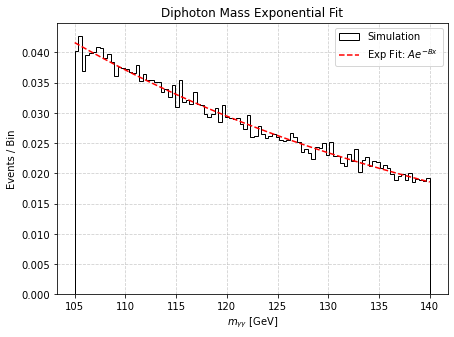

Fitted Parameters: A = 0.468, B = 0.02304


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define exponential function for fitting
def exp_fit(x, A, B):
    return A * np.exp(-B * x)

# Create histogram
bins = np.linspace(105, 140, 100)  # Adjust as needed
hist, bin_edges = np.histogram(diphoton_mass_np, bins=bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin centers

# Fit histogram data to exponential function
params, covariance = curve_fit(exp_fit, bin_centers, hist, p0=[1, 0.01])

# Generate fitted curve
x_fit = np.linspace(105, 140, 500)
y_fit = exp_fit(x_fit, *params)

# Plot histogram and exponential fit
plt.figure(figsize=(7, 5))
plt.hist(diphoton_mass_np, bins=bins, density=True, histtype="step", color="black", label="Simulation")
plt.plot(x_fit, y_fit, color="red", linestyle="--", label=r"Exp Fit: $A e^{-Bx}$")

# Labels and formatting
plt.xlabel(r"$m_{\gamma\gamma}$ [GeV]")
plt.ylabel("Events / Bin")
plt.legend()
plt.title("Diphoton Mass Exponential Fit")
plt.grid(True, linestyle="--", alpha=0.6)

# Show the plot

plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_GGJets.pdf")
plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_GGJets.png")
plt.show()
# Print fit parameters
print(f"Fitted Parameters: A = {params[0]:.3f}, B = {params[1]:.5f}")


In [ ]:
#uncertainity


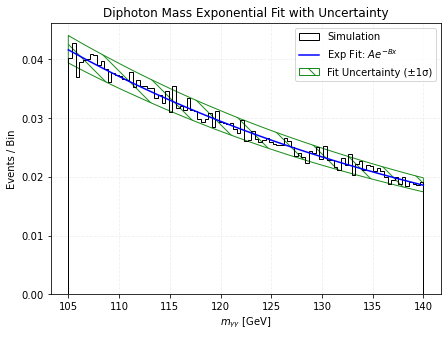

Fitted Parameters: A = 0.468 ± 0.021, B = 0.02304 ± 0.00037


In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define exponential function for fitting
def exp_fit(x, A, B):
    return A * np.exp(-B * x)

# Create histogram
bins = np.linspace(105, 140, 100)  # Adjust as needed
hist, bin_edges = np.histogram(diphoton_mass_np, bins=bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin centers

# Fit histogram data to exponential function
params, covariance = curve_fit(exp_fit, bin_centers, hist, p0=[1, 0.01])

# Extract fit parameters and uncertainties
A_fit, B_fit = params
A_err, B_err = np.sqrt(np.diag(covariance))  # Uncertainties

# Generate fitted curve
x_fit = np.linspace(105, 140, 500)
y_fit = exp_fit(x_fit, A_fit, B_fit)

# Generate uncertainty bands using Monte Carlo sampling
num_samples = 1000
y_samples = np.array([exp_fit(x_fit, 
                              np.random.normal(A_fit, A_err), 
                              np.random.normal(B_fit, B_err)) 
                      for _ in range(num_samples)])

y_err_up = np.percentile(y_samples, 84, axis=0)  # +1σ (Upper bound)
y_err_down = np.percentile(y_samples, 16, axis=0)  # -1σ (Lower bound)

# Plot histogram
plt.figure(figsize=(7, 5))
plt.hist(diphoton_mass_np, bins=bins, density=True, histtype="step", color="black", label="Simulation")

# Plot fit and hatched uncertainty bands
plt.plot(x_fit, y_fit, color="blue", linestyle="-", label=r"Exp Fit: $A e^{-Bx}$")

# Apply hatched pattern to uncertainty band
plt.fill_between(x_fit, y_err_down, y_err_up, 
                 facecolor="none", edgecolor="green", hatch="\\", alpha=0.9, label="Fit Uncertainty (±1σ)")

# Labels and CMS-style formatting
plt.xlabel(r"$m_{\gamma\gamma}$ [GeV]")
plt.ylabel("Events / Bin")
plt.legend()
plt.title("Diphoton Mass Exponential Fit with Uncertainty")
plt.grid(True, linestyle="--", alpha=0.2)

# Save the plot
plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_GGJets_with_hatch_uncertainty.pdf")
plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_GGJets_with_hatch_uncertainty.png")
plt.show()

# Print fit parameters with uncertainties
print(f"Fitted Parameters: A = {A_fit:.3f} ± {A_err:.3f}, B = {B_fit:.5f} ± {B_err:.5f}")


### vector-boson fusion (VBFH)

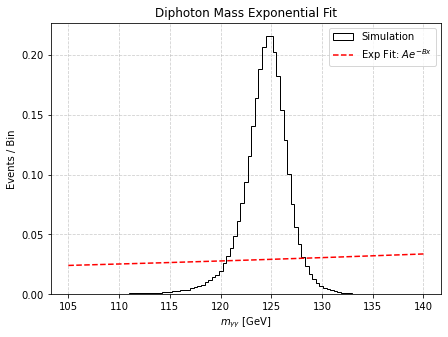

Fitted Parameters: A = 0.009, B = -0.00954


In [39]:
import uproot
import awkward as ak
from vector import Array as awk
import numpy as np

# Path to the ROOT file and tree
file_path_signal = "../../../output_root/v2_production/backgrounds/VBFHToGG.root"
tree_name = "DiphotonTree/data_125_13TeV_NOTAG/"


# Load the ROOT file and extract variables
with uproot.open(file_path_signal) as file:
    tree = file[tree_name]
    
    # Extract b-jet variables
    lead_bjet_pt = tree["Res_lead_bjet_pt"].array(library="ak")    # Transverse momentum of leading b-jet
    lead_bjet_eta = tree["Res_lead_bjet_eta"].array(library="ak")  # Pseudorapidity of leading b-jet
    lead_bjet_phi = tree["Res_lead_bjet_phi"].array(library="ak")  # Azimuthal angle of leading b-jet
    lead_bjet_mass = tree["Res_lead_bjet_mass"].array(library="ak") # Mass of leading b-jet

    sublead_bjet_pt = tree["Res_sublead_bjet_pt"].array(library="ak")    # Transverse momentum of subleading b-jet
    sublead_bjet_eta = tree["Res_sublead_bjet_eta"].array(library="ak")  # Pseudorapidity of subleading b-jet
    sublead_bjet_phi = tree["Res_sublead_bjet_phi"].array(library="ak")  # Azimuthal angle of subleading b-jet
    sublead_bjet_mass = tree["Res_sublead_bjet_mass"].array(library="ak") # Mass of subleading b-jet

    # Extract dijet variables
    dijet_pt = tree["Res_dijet_pt"].array(library="ak")    # Transverse momentum of the dijet system
    dijet_eta = tree["Res_dijet_eta"].array(library="ak")  # Pseudorapidity of the dijet system
    dijet_phi = tree["Res_dijet_phi"].array(library="ak")  # Azimuthal angle of the dijet system
    dijet_mass = tree["Res_dijet_mass"].array(library="ak") # Mass of the dijet system
    
    bbgg_mass = tree["Res_HHbbggCandidate_mass"].array(library="ak")


# Load the ROOT file and extract variables
with uproot.open(file_path_signal) as file:
    tree = file[tree_name]
    lead_pho_pt = tree["lead_pt"].array(library="ak")
    lead_pho_eta = tree["lead_eta"].array(library="ak")
    lead_pho_phi = tree["lead_phi"].array(library="ak")
    sublead_pho_pt = tree["sublead_pt"].array(library="ak")
    sublead_pho_eta = tree["sublead_eta"].array(library="ak")
    sublead_pho_phi = tree["sublead_phi"].array(library="ak")

# Define the lVector function
def lVector(pt1, eta1, phi1, pt2, eta2, phi2, mass1=0, mass2=0):
    lvec_1 = awk(
        ak.zip({"pt": pt1, "eta": eta1, "phi": phi1, "mass": ak.full_like(pt1, mass1)})
    )
    lvec_2 = awk(
        ak.zip({"pt": pt2, "eta": eta2, "phi": phi2, "mass": ak.full_like(pt2, mass2)})
    )
    lvec_ = lvec_1 + lvec_2
    return lvec_

# Compute the diphoton Lorentz vector
diphoton_ = lVector(
    lead_pho_pt,
    lead_pho_eta,
    lead_pho_phi,
    sublead_pho_pt,
    sublead_pho_eta,
    sublead_pho_phi,
)


# Compute diphoton mass from its Lorentz vector
diphoton_mass = diphoton_.mass


diphoton_mass_np = ak.to_numpy(diphoton_mass)

# Convert extracted variabless to NumPy arrays
bbgg_mass_np = ak.to_numpy(bbgg_mass)
# dibjet_mass_np = ak.to_numpy(dibjet_mass)

# Compute reduced_mass
reduced_mass = bbgg_mass_np - (diphoton_mass_np - 125) - (dijet_mass - 125)

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define exponential function for fitting
def exp_fit(x, A, B):
    return A * np.exp(-B * x)

# Create histogram
bins = np.linspace(105, 140, 100)  # Adjust as needed
hist, bin_edges = np.histogram(diphoton_mass_np, bins=bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin centers

# Fit histogram data to exponential function
params, covariance = curve_fit(exp_fit, bin_centers, hist, p0=[1, 0.01])

# Generate fitted curve
x_fit = np.linspace(105, 140, 500)
y_fit = exp_fit(x_fit, *params)

# Plot histogram and exponential fit
plt.figure(figsize=(7, 5))
plt.hist(diphoton_mass_np, bins=bins, density=True, histtype="step", color="black", label="Simulation")
plt.plot(x_fit, y_fit, color="red", linestyle="--", label=r"Exp Fit: $A e^{-Bx}$")

# Labels and formatting
plt.xlabel(r"$m_{\gamma\gamma}$ [GeV]")
plt.ylabel("Events / Bin")
plt.legend()
plt.title("Diphoton Mass Exponential Fit")
plt.grid(True, linestyle="--", alpha=0.6)

# Show the plot

# plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_GJet40.pdf")
# plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_GJet40.png")
plt.show()
# Print fit parameters
print(f"Fitted Parameters: A = {params[0]:.3f}, B = {params[1]:.5f}")



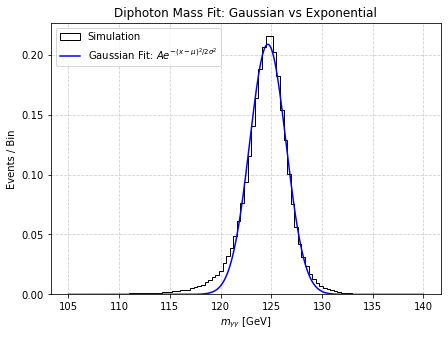

Gaussian Fit Parameters: A = 0.209, μ = 124.67 GeV, σ = 1.79 GeV
Exponential Fit Parameters: A = 0.009, B = -0.00954


In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define Gaussian function
def gaussian(x, A, mu, sigma):
    return A * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Define Exponential function (for comparison)
def exp_fit(x, A, B):
    return A * np.exp(-B * x)

# Create histogram
bins = np.linspace(105, 140, 100)  # Adjust as needed
hist, bin_edges = np.histogram(diphoton_mass_np, bins=bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin centers

# Fit Gaussian to histogram data
p0_gaussian = [max(hist), 125, 2]  # Initial guesses: peak height, mean (125 GeV), width
params_gaussian, _ = curve_fit(gaussian, bin_centers, hist, p0=p0_gaussian)

# Fit Exponential for comparison
p0_exp = [1, 0.01]
params_exp, _ = curve_fit(exp_fit, bin_centers, hist, p0=p0_exp)

# Generate fitted curves
x_fit = np.linspace(105, 140, 500)
y_gaussian = gaussian(x_fit, *params_gaussian)
y_exp = exp_fit(x_fit, *params_exp)

# Plot histogram
plt.figure(figsize=(7, 5))
plt.hist(diphoton_mass_np, bins=bins, density=True, histtype="step", color="black", label="Simulation")

# Plot Gaussian fit
plt.plot(x_fit, y_gaussian, color="blue", linestyle="-", label=r"Gaussian Fit: $A e^{-(x-\mu)^2 / 2\sigma^2}$")

# Plot Exponential fit (for comparison)
# plt.plot(x_fit, y_exp, color="red", linestyle="--", label=r"Exp Fit: $A e^{-Bx}$")

# Labels and formatting
plt.xlabel(r"$m_{\gamma\gamma}$ [GeV]")
plt.ylabel("Events / Bin")
plt.legend()
plt.title("Diphoton Mass Fit: Gaussian vs Exponential")
plt.grid(True, linestyle="--", alpha=0.6)

plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_VBFHToGG.pdf")
plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_VBFHToGG.png")
plt.show()

# Print Gaussian fit parameters
print(f"Gaussian Fit Parameters: A = {params_gaussian[0]:.3f}, μ = {params_gaussian[1]:.2f} GeV, σ = {params_gaussian[2]:.2f} GeV")
print(f"Exponential Fit Parameters: A = {params_exp[0]:.3f}, B = {params_exp[1]:.5f}")


#### Crystal ball and gaussian

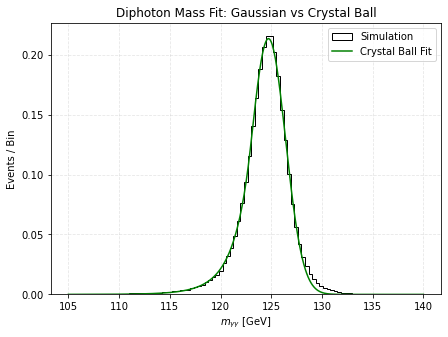

Gaussian Fit Parameters: A = 0.209, μ = 124.67 GeV, σ = 1.79 GeV
Crystal Ball Fit Parameters: A = 0.213, μ = 124.73 GeV, σ = 1.68 GeV, α = 1.05, n = 16.99


In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import erf

# Define Gaussian function
def gaussian(x, A, mu, sigma):
    return A * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Define Crystal Ball function
def crystal_ball(x, A, mu, sigma, alpha, n):
    """
    Crystal Ball function with parameters:
    - A: Amplitude
    - mu: Mean (center)
    - sigma: Width
    - alpha: Transition point between Gaussian and power-law
    - n: Power-law tail exponent
    """
    z = (x - mu) / sigma
    if isinstance(z, np.ndarray):
        mask = z > -alpha
        cb = np.zeros_like(z)
        cb[mask] = np.exp(-0.5 * z[mask]**2)  # Gaussian core
        cb[~mask] = (n / abs(alpha))**n * np.exp(-0.5 * alpha**2) / ((n / abs(alpha) - abs(alpha) - z[~mask])**n)  # Power-law tail
        return A * cb
    else:
        if z > -alpha:
            return A * np.exp(-0.5 * z**2)
        else:
            return A * (n / abs(alpha))**n * np.exp(-0.5 * alpha**2) / ((n / abs(alpha) - abs(alpha) - z)**n)

# Create histogram
bins = np.linspace(105, 140, 100)  # Adjust as needed
hist, bin_edges = np.histogram(diphoton_mass_np, bins=bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin centers

# Fit Gaussian to histogram data
p0_gaussian = [max(hist), 125, 2]  # Initial guesses: peak height, mean (125 GeV), width
params_gaussian, _ = curve_fit(gaussian, bin_centers, hist, p0=p0_gaussian)

# Fit Crystal Ball function
p0_cb = [max(hist), 125, 2, 1.5, 5]  # Initial guesses: A, mu, sigma, alpha, n
params_cb, _ = curve_fit(crystal_ball, bin_centers, hist, p0=p0_cb)

# Generate fitted curves
x_fit = np.linspace(105, 140, 500)
y_gaussian = gaussian(x_fit, *params_gaussian)
y_cb = crystal_ball(x_fit, *params_cb)

# Plot histogram
plt.figure(figsize=(7, 5))
plt.hist(diphoton_mass_np, bins=bins, density=True, histtype="step", color="black", label="Simulation")

# Plot Gaussian fit
# plt.plot(x_fit, y_gaussian, color="blue", linestyle="-", label=r"Gaussian Fit: $A e^{-(x-\mu)^2 / 2\sigma^2}$")

# Plot Crystal Ball fit
plt.plot(x_fit, y_cb, color="green", linestyle="-", label=r"Crystal Ball Fit")

# Labels and formatting
plt.xlabel(r"$m_{\gamma\gamma}$ [GeV]")
plt.ylabel("Events / Bin")
plt.legend()
plt.title("Diphoton Mass Fit: Gaussian vs Crystal Ball")
plt.grid(True, linestyle="--", alpha=0.3)

# Save the plot
plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_VBFHToGG_Crystalball.pdf")
plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_VBFHToGG_Crystalball.png")
plt.show()

# Print fit parameters
print(f"Gaussian Fit Parameters: A = {params_gaussian[0]:.3f}, μ = {params_gaussian[1]:.2f} GeV, σ = {params_gaussian[2]:.2f} GeV")
print(f"Crystal Ball Fit Parameters: A = {params_cb[0]:.3f}, μ = {params_cb[1]:.2f} GeV, σ = {params_cb[2]:.2f} GeV, α = {params_cb[3]:.2f}, n = {params_cb[4]:.2f}")


#### double side crystal ball

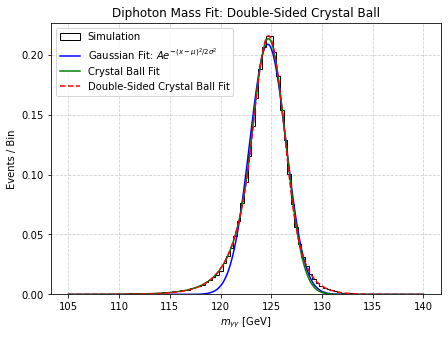

Double-Sided Crystal Ball Fit Parameters:
A = 0.216, μ = 124.73 GeV, σ = 1.63 GeV
Left Tail: α_L = 0.97, n_L = 47.52
Right Tail: α_R = 1.36, n_R = 78.06


In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define Double-Sided Crystal Ball (DSCB) function
def double_sided_crystal_ball(x, A, mu, sigma, alpha_L, n_L, alpha_R, n_R):
    """
    Double-Sided Crystal Ball Function
    - A: Amplitude
    - mu: Mean (center)
    - sigma: Width (Gaussian core)
    - alpha_L: Transition point for left tail
    - n_L: Power-law exponent for left tail
    - alpha_R: Transition point for right tail
    - n_R: Power-law exponent for right tail
    """
    z = (x - mu) / sigma
    abs_alpha_L = abs(alpha_L)
    abs_alpha_R = abs(alpha_R)

    if isinstance(z, np.ndarray):
        cb = np.zeros_like(z)

        # Gaussian core
        mask_core = (z > -abs_alpha_L) & (z < abs_alpha_R)
        cb[mask_core] = np.exp(-0.5 * z[mask_core]**2)

        # Left tail (power-law)
        mask_left = z <= -abs_alpha_L
        cb[mask_left] = (n_L / abs_alpha_L) ** n_L * np.exp(-0.5 * abs_alpha_L**2) / \
                        ((n_L / abs_alpha_L - abs_alpha_L - z[mask_left]) ** n_L)

        # Right tail (power-law)
        mask_right = z >= abs_alpha_R
        cb[mask_right] = (n_R / abs_alpha_R) ** n_R * np.exp(-0.5 * abs_alpha_R**2) / \
                         ((n_R / abs_alpha_R - abs_alpha_R + z[mask_right]) ** n_R)

        return A * cb
    else:
        if -abs_alpha_L < z < abs_alpha_R:
            return A * np.exp(-0.5 * z**2)
        elif z <= -abs_alpha_L:
            return A * (n_L / abs_alpha_L) ** n_L * np.exp(-0.5 * abs_alpha_L**2) / ((n_L / abs_alpha_L - abs_alpha_L - z) ** n_L)
        else:  # z >= abs_alpha_R
            return A * (n_R / abs_alpha_R) ** n_R * np.exp(-0.5 * abs_alpha_R**2) / ((n_R / abs_alpha_R - abs_alpha_R + z) ** n_R)

# Create histogram
bins = np.linspace(105, 140, 100)  # Adjust as needed
hist, bin_edges = np.histogram(diphoton_mass_np, bins=bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin centers

# Fit Double-Sided Crystal Ball
p0_dscb = [max(hist), 125, 2, 1.5, 5, 1.5, 5]  # Initial guesses: A, mu, sigma, alpha_L, n_L, alpha_R, n_R
params_dscb, _ = curve_fit(double_sided_crystal_ball, bin_centers, hist, p0=p0_dscb)

# Generate fitted curve
x_fit = np.linspace(105, 140, 500)
y_dscb = double_sided_crystal_ball(x_fit, *params_dscb)

# Plot histogram
plt.figure(figsize=(7, 5))
plt.hist(diphoton_mass_np, bins=bins, density=True, histtype="step", color="black", label="Simulation")

# Plot Gaussian fit
plt.plot(x_fit, y_gaussian, color="blue", linestyle="-", label=r"Gaussian Fit: $A e^{-(x-\mu)^2 / 2\sigma^2}$")

# Plot Crystal Ball fit
plt.plot(x_fit, y_cb, color="green", linestyle="-", label=r"Crystal Ball Fit")

# Plot DSCB fit
plt.plot(x_fit, y_dscb, color="red", linestyle="--", label="Double-Sided Crystal Ball Fit")

# Labels and formatting
plt.xlabel(r"$m_{\gamma\gamma}$ [GeV]")
plt.ylabel("Events / Bin")
plt.legend()
plt.title("Diphoton Mass Fit: Double-Sided Crystal Ball")
plt.grid(True, linestyle="--", alpha=0.6)

# Save the plot
plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/comparison_fitting_VBFHToGG_fitting_DSCB.pdf")
plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/comparison_fitting_VBFHToGG_fitting_DSCB.png")
plt.show()

# Print fit parameters
print(f"Double-Sided Crystal Ball Fit Parameters:")
print(f"A = {params_dscb[0]:.3f}, μ = {params_dscb[1]:.2f} GeV, σ = {params_dscb[2]:.2f} GeV")
print(f"Left Tail: α_L = {params_dscb[3]:.2f}, n_L = {params_dscb[4]:.2f}")
print(f"Right Tail: α_R = {params_dscb[5]:.2f}, n_R = {params_dscb[6]:.2f}")


# VHToGG

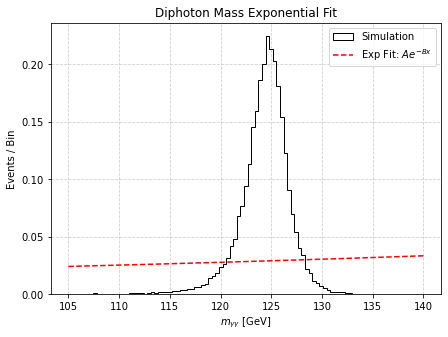

Fitted Parameters: A = 0.009, B = -0.00923


In [44]:
import uproot
import awkward as ak
from vector import Array as awk
import numpy as np

# Path to the ROOT file and tree
file_path_signal = "../../../output_root/v2_production/backgrounds/VHToGG.root"
tree_name = "DiphotonTree/data_125_13TeV_NOTAG/"


# Load the ROOT file and extract variables
with uproot.open(file_path_signal) as file:
    tree = file[tree_name]
    
    # Extract b-jet variables
    lead_bjet_pt = tree["Res_lead_bjet_pt"].array(library="ak")    # Transverse momentum of leading b-jet
    lead_bjet_eta = tree["Res_lead_bjet_eta"].array(library="ak")  # Pseudorapidity of leading b-jet
    lead_bjet_phi = tree["Res_lead_bjet_phi"].array(library="ak")  # Azimuthal angle of leading b-jet
    lead_bjet_mass = tree["Res_lead_bjet_mass"].array(library="ak") # Mass of leading b-jet

    sublead_bjet_pt = tree["Res_sublead_bjet_pt"].array(library="ak")    # Transverse momentum of subleading b-jet
    sublead_bjet_eta = tree["Res_sublead_bjet_eta"].array(library="ak")  # Pseudorapidity of subleading b-jet
    sublead_bjet_phi = tree["Res_sublead_bjet_phi"].array(library="ak")  # Azimuthal angle of subleading b-jet
    sublead_bjet_mass = tree["Res_sublead_bjet_mass"].array(library="ak") # Mass of subleading b-jet

    # Extract dijet variables
    dijet_pt = tree["Res_dijet_pt"].array(library="ak")    # Transverse momentum of the dijet system
    dijet_eta = tree["Res_dijet_eta"].array(library="ak")  # Pseudorapidity of the dijet system
    dijet_phi = tree["Res_dijet_phi"].array(library="ak")  # Azimuthal angle of the dijet system
    dijet_mass = tree["Res_dijet_mass"].array(library="ak") # Mass of the dijet system
    
    bbgg_mass = tree["Res_HHbbggCandidate_mass"].array(library="ak")


# Load the ROOT file and extract variables
with uproot.open(file_path_signal) as file:
    tree = file[tree_name]
    lead_pho_pt = tree["lead_pt"].array(library="ak")
    lead_pho_eta = tree["lead_eta"].array(library="ak")
    lead_pho_phi = tree["lead_phi"].array(library="ak")
    sublead_pho_pt = tree["sublead_pt"].array(library="ak")
    sublead_pho_eta = tree["sublead_eta"].array(library="ak")
    sublead_pho_phi = tree["sublead_phi"].array(library="ak")

# Define the lVector function
def lVector(pt1, eta1, phi1, pt2, eta2, phi2, mass1=0, mass2=0):
    lvec_1 = awk(
        ak.zip({"pt": pt1, "eta": eta1, "phi": phi1, "mass": ak.full_like(pt1, mass1)})
    )
    lvec_2 = awk(
        ak.zip({"pt": pt2, "eta": eta2, "phi": phi2, "mass": ak.full_like(pt2, mass2)})
    )
    lvec_ = lvec_1 + lvec_2
    return lvec_

# Compute the diphoton Lorentz vector
diphoton_ = lVector(
    lead_pho_pt,
    lead_pho_eta,
    lead_pho_phi,
    sublead_pho_pt,
    sublead_pho_eta,
    sublead_pho_phi,
)


# Compute diphoton mass from its Lorentz vector
diphoton_mass = diphoton_.mass


diphoton_mass_np = ak.to_numpy(diphoton_mass)

# Convert extracted variabless to NumPy arrays
bbgg_mass_np = ak.to_numpy(bbgg_mass)
# dibjet_mass_np = ak.to_numpy(dibjet_mass)

# Compute reduced_mass
reduced_mass = bbgg_mass_np - (diphoton_mass_np - 125) - (dijet_mass - 125)

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define exponential function for fitting
def exp_fit(x, A, B):
    return A * np.exp(-B * x)

# Create histogram
bins = np.linspace(105, 140, 100)  # Adjust as needed
hist, bin_edges = np.histogram(diphoton_mass_np, bins=bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin centers

# Fit histogram data to exponential function
params, covariance = curve_fit(exp_fit, bin_centers, hist, p0=[1, 0.01])

# Generate fitted curve
x_fit = np.linspace(105, 140, 500)
y_fit = exp_fit(x_fit, *params)

# Plot histogram and exponential fit
plt.figure(figsize=(7, 5))
plt.hist(diphoton_mass_np, bins=bins, density=True, histtype="step", color="black", label="Simulation")
plt.plot(x_fit, y_fit, color="red", linestyle="--", label=r"Exp Fit: $A e^{-Bx}$")

# Labels and formatting
plt.xlabel(r"$m_{\gamma\gamma}$ [GeV]")
plt.ylabel("Events / Bin")
plt.legend()
plt.title("Diphoton Mass Exponential Fit")
plt.grid(True, linestyle="--", alpha=0.6)

# Show the plot

# plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_VHToGG.pdf")
# plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_VHToGG.png")
plt.show()
# Print fit parameters
print(f"Fitted Parameters: A = {params[0]:.3f}, B = {params[1]:.5f}")



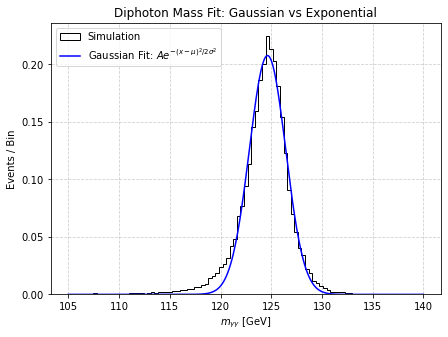

Gaussian Fit Parameters: A = 0.208, μ = 124.64 GeV, σ = 1.79 GeV
Exponential Fit Parameters: A = 0.009, B = -0.00923


In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define Gaussian function
def gaussian(x, A, mu, sigma):
    return A * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Define Exponential function (for comparison)
def exp_fit(x, A, B):
    return A * np.exp(-B * x)

# Create histogram
bins = np.linspace(105, 140, 100)  # Adjust as needed
hist, bin_edges = np.histogram(diphoton_mass_np, bins=bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin centers

# Fit Gaussian to histogram data
p0_gaussian = [max(hist), 125, 2]  # Initial guesses: peak height, mean (125 GeV), width
params_gaussian, _ = curve_fit(gaussian, bin_centers, hist, p0=p0_gaussian)

# Fit Exponential for comparison
p0_exp = [1, 0.01]
params_exp, _ = curve_fit(exp_fit, bin_centers, hist, p0=p0_exp)

# Generate fitted curves
x_fit = np.linspace(105, 140, 500)
y_gaussian = gaussian(x_fit, *params_gaussian)
y_exp = exp_fit(x_fit, *params_exp)

# Plot histogram
plt.figure(figsize=(7, 5))
plt.hist(diphoton_mass_np, bins=bins, density=True, histtype="step", color="black", label="Simulation")

# Plot Gaussian fit
plt.plot(x_fit, y_gaussian, color="blue", linestyle="-", label=r"Gaussian Fit: $A e^{-(x-\mu)^2 / 2\sigma^2}$")

# Plot Exponential fit (for comparison)
# plt.plot(x_fit, y_exp, color="red", linestyle="--", label=r"Exp Fit: $A e^{-Bx}$")

# Labels and formatting
plt.xlabel(r"$m_{\gamma\gamma}$ [GeV]")
plt.ylabel("Events / Bin")
plt.legend()
plt.title("Diphoton Mass Fit: Gaussian vs Exponential")
plt.grid(True, linestyle="--", alpha=0.6)

# Show plot
plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_VHToGG.pdf")
plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_VHToGG.png")
plt.show()

# Print Gaussian fit parameters
print(f"Gaussian Fit Parameters: A = {params_gaussian[0]:.3f}, μ = {params_gaussian[1]:.2f} GeV, σ = {params_gaussian[2]:.2f} GeV")
print(f"Exponential Fit Parameters: A = {params_exp[0]:.3f}, B = {params_exp[1]:.5f}")


/tmp/sraj/ipykernel_3170181/1760082765.py:31: RuntimeWarning: overflow encountered in power
  ((n_L / abs_alpha_L - abs_alpha_L - z[mask_left]) ** n_L)
/tmp/sraj/ipykernel_3170181/1760082765.py:30: RuntimeWarning: overflow encountered in double_scalars
  cb[mask_left] = (n_L / abs_alpha_L) ** n_L * np.exp(-0.5 * abs_alpha_L**2) / \
/tmp/sraj/ipykernel_3170181/1760082765.py:30: RuntimeWarning: invalid value encountered in divide
  cb[mask_left] = (n_L / abs_alpha_L) ** n_L * np.exp(-0.5 * abs_alpha_L**2) / \


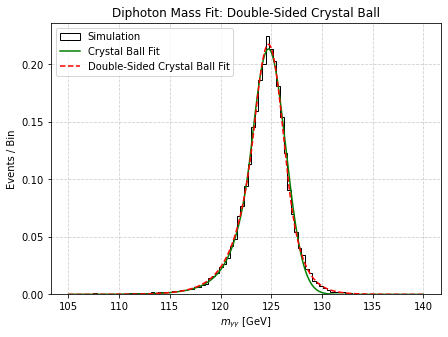

Double-Sided Crystal Ball Fit Parameters:
A = 0.217, μ = 124.72 GeV, σ = 1.56 GeV
Left Tail: α_L = 0.86, n_L = 137.93
Right Tail: α_R = 1.25, n_R = 72.11


In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define Double-Sided Crystal Ball (DSCB) function
def double_sided_crystal_ball(x, A, mu, sigma, alpha_L, n_L, alpha_R, n_R):
    """
    Double-Sided Crystal Ball Function
    - A: Amplitude
    - mu: Mean (center)
    - sigma: Width (Gaussian core)
    - alpha_L: Transition point for left tail
    - n_L: Power-law exponent for left tail
    - alpha_R: Transition point for right tail
    - n_R: Power-law exponent for right tail
    """
    z = (x - mu) / sigma
    abs_alpha_L = abs(alpha_L)
    abs_alpha_R = abs(alpha_R)

    if isinstance(z, np.ndarray):
        cb = np.zeros_like(z)

        # Gaussian core
        mask_core = (z > -abs_alpha_L) & (z < abs_alpha_R)
        cb[mask_core] = np.exp(-0.5 * z[mask_core]**2)

        # Left tail (power-law)
        mask_left = z <= -abs_alpha_L
        cb[mask_left] = (n_L / abs_alpha_L) ** n_L * np.exp(-0.5 * abs_alpha_L**2) / \
                        ((n_L / abs_alpha_L - abs_alpha_L - z[mask_left]) ** n_L)

        # Right tail (power-law)
        mask_right = z >= abs_alpha_R
        cb[mask_right] = (n_R / abs_alpha_R) ** n_R * np.exp(-0.5 * abs_alpha_R**2) / \
                         ((n_R / abs_alpha_R - abs_alpha_R + z[mask_right]) ** n_R)

        return A * cb
    else:
        if -abs_alpha_L < z < abs_alpha_R:
            return A * np.exp(-0.5 * z**2)
        elif z <= -abs_alpha_L:
            return A * (n_L / abs_alpha_L) ** n_L * np.exp(-0.5 * abs_alpha_L**2) / ((n_L / abs_alpha_L - abs_alpha_L - z) ** n_L)
        else:  # z >= abs_alpha_R
            return A * (n_R / abs_alpha_R) ** n_R * np.exp(-0.5 * abs_alpha_R**2) / ((n_R / abs_alpha_R - abs_alpha_R + z) ** n_R)

# Create histogram
bins = np.linspace(105, 140, 100)  # Adjust as needed
hist, bin_edges = np.histogram(diphoton_mass_np, bins=bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin centers

# Fit Double-Sided Crystal Ball
p0_dscb = [max(hist), 125, 2, 1.5, 5, 1.5, 5]  # Initial guesses: A, mu, sigma, alpha_L, n_L, alpha_R, n_R
params_dscb, _ = curve_fit(double_sided_crystal_ball, bin_centers, hist, p0=p0_dscb)

# Generate fitted curve
x_fit = np.linspace(105, 140, 500)
y_dscb = double_sided_crystal_ball(x_fit, *params_dscb)

# Plot histogram
plt.figure(figsize=(7, 5))
plt.hist(diphoton_mass_np, bins=bins, density=True, histtype="step", color="black", label="Simulation")

# Plot Gaussian fit
# plt.plot(x_fit, y_gaussian, color="blue", linestyle="-", label=r"Gaussian Fit: $A e^{-(x-\mu)^2 / 2\sigma^2}$")

# Plot Crystal Ball fit
plt.plot(x_fit, y_cb, color="green", linestyle="-", label=r"Crystal Ball Fit")

# Plot DSCB fit
plt.plot(x_fit, y_dscb, color="red", linestyle="--", label="Double-Sided Crystal Ball Fit")

# Labels and formatting
plt.xlabel(r"$m_{\gamma\gamma}$ [GeV]")
plt.ylabel("Events / Bin")
plt.legend()
plt.title("Diphoton Mass Fit: Double-Sided Crystal Ball")
plt.grid(True, linestyle="--", alpha=0.6)

# Save the plot
plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/comparison_fitting_VHToGG_fitting_DSCB.pdf")
plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/comparison_fitting_VHToGG_fitting_DSCB.png")
plt.show()

# Print fit parameters
print(f"Double-Sided Crystal Ball Fit Parameters:")
print(f"A = {params_dscb[0]:.3f}, μ = {params_dscb[1]:.2f} GeV, σ = {params_dscb[2]:.2f} GeV")
print(f"Left Tail: α_L = {params_dscb[3]:.2f}, n_L = {params_dscb[4]:.2f}")
print(f"Right Tail: α_R = {params_dscb[5]:.2f}, n_R = {params_dscb[6]:.2f}")


## ttH

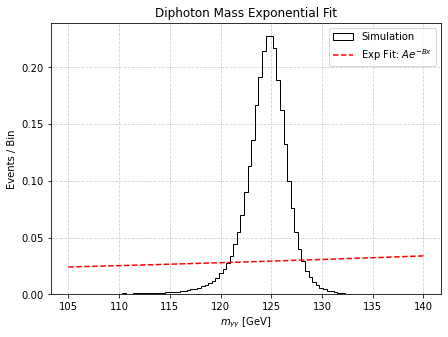

Fitted Parameters: A = 0.009, B = -0.00974


In [48]:
import uproot
import awkward as ak
from vector import Array as awk
import numpy as np

# Path to the ROOT file and tree
file_path_signal = "../../../output_root/v2_production/backgrounds/ttHToGG.root"
tree_name = "DiphotonTree/data_125_13TeV_NOTAG/"


# Load the ROOT file and extract variables
with uproot.open(file_path_signal) as file:
    tree = file[tree_name]
    
    # Extract b-jet variables
    lead_bjet_pt = tree["Res_lead_bjet_pt"].array(library="ak")    # Transverse momentum of leading b-jet
    lead_bjet_eta = tree["Res_lead_bjet_eta"].array(library="ak")  # Pseudorapidity of leading b-jet
    lead_bjet_phi = tree["Res_lead_bjet_phi"].array(library="ak")  # Azimuthal angle of leading b-jet
    lead_bjet_mass = tree["Res_lead_bjet_mass"].array(library="ak") # Mass of leading b-jet

    sublead_bjet_pt = tree["Res_sublead_bjet_pt"].array(library="ak")    # Transverse momentum of subleading b-jet
    sublead_bjet_eta = tree["Res_sublead_bjet_eta"].array(library="ak")  # Pseudorapidity of subleading b-jet
    sublead_bjet_phi = tree["Res_sublead_bjet_phi"].array(library="ak")  # Azimuthal angle of subleading b-jet
    sublead_bjet_mass = tree["Res_sublead_bjet_mass"].array(library="ak") # Mass of subleading b-jet

    # Extract dijet variables
    dijet_pt = tree["Res_dijet_pt"].array(library="ak")    # Transverse momentum of the dijet system
    dijet_eta = tree["Res_dijet_eta"].array(library="ak")  # Pseudorapidity of the dijet system
    dijet_phi = tree["Res_dijet_phi"].array(library="ak")  # Azimuthal angle of the dijet system
    dijet_mass = tree["Res_dijet_mass"].array(library="ak") # Mass of the dijet system
    
    bbgg_mass = tree["Res_HHbbggCandidate_mass"].array(library="ak")


# Load the ROOT file and extract variables
with uproot.open(file_path_signal) as file:
    tree = file[tree_name]
    lead_pho_pt = tree["lead_pt"].array(library="ak")
    lead_pho_eta = tree["lead_eta"].array(library="ak")
    lead_pho_phi = tree["lead_phi"].array(library="ak")
    sublead_pho_pt = tree["sublead_pt"].array(library="ak")
    sublead_pho_eta = tree["sublead_eta"].array(library="ak")
    sublead_pho_phi = tree["sublead_phi"].array(library="ak")

# Define the lVector function
def lVector(pt1, eta1, phi1, pt2, eta2, phi2, mass1=0, mass2=0):
    lvec_1 = awk(
        ak.zip({"pt": pt1, "eta": eta1, "phi": phi1, "mass": ak.full_like(pt1, mass1)})
    )
    lvec_2 = awk(
        ak.zip({"pt": pt2, "eta": eta2, "phi": phi2, "mass": ak.full_like(pt2, mass2)})
    )
    lvec_ = lvec_1 + lvec_2
    return lvec_

# Compute the diphoton Lorentz vector
diphoton_ = lVector(
    lead_pho_pt,
    lead_pho_eta,
    lead_pho_phi,
    sublead_pho_pt,
    sublead_pho_eta,
    sublead_pho_phi,
)


# Compute diphoton mass from its Lorentz vector
diphoton_mass = diphoton_.mass


diphoton_mass_np = ak.to_numpy(diphoton_mass)

# Convert extracted variabless to NumPy arrays
bbgg_mass_np = ak.to_numpy(bbgg_mass)
# dibjet_mass_np = ak.to_numpy(dibjet_mass)

# Compute reduced_mass
reduced_mass = bbgg_mass_np - (diphoton_mass_np - 125) - (dijet_mass - 125)

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define exponential function for fitting
def exp_fit(x, A, B):
    return A * np.exp(-B * x)

# Create histogram
bins = np.linspace(105, 140, 100)  # Adjust as needed
hist, bin_edges = np.histogram(diphoton_mass_np, bins=bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin centers

# Fit histogram data to exponential function
params, covariance = curve_fit(exp_fit, bin_centers, hist, p0=[1, 0.01])

# Generate fitted curve
x_fit = np.linspace(105, 140, 500)
y_fit = exp_fit(x_fit, *params)

# Plot histogram and exponential fit
plt.figure(figsize=(7, 5))
plt.hist(diphoton_mass_np, bins=bins, density=True, histtype="step", color="black", label="Simulation")
plt.plot(x_fit, y_fit, color="red", linestyle="--", label=r"Exp Fit: $A e^{-Bx}$")

# Labels and formatting
plt.xlabel(r"$m_{\gamma\gamma}$ [GeV]")
plt.ylabel("Events / Bin")
plt.legend()
plt.title("Diphoton Mass Exponential Fit")
plt.grid(True, linestyle="--", alpha=0.6)

# Show the plot

# plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_ttHToGG.pdf")
# plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_ttHToGG.png")
plt.show()
# Print fit parameters
print(f"Fitted Parameters: A = {params[0]:.3f}, B = {params[1]:.5f}")



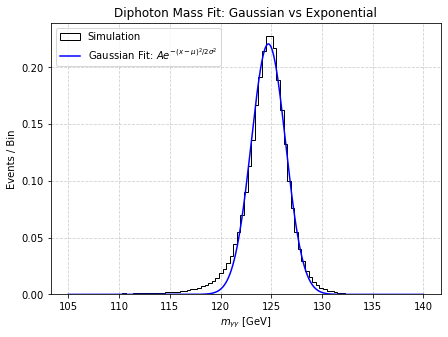

Gaussian Fit Parameters: A = 0.220, μ = 124.72 GeV, σ = 1.69 GeV
Exponential Fit Parameters: A = 0.009, B = -0.00974


In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define Gaussian function
def gaussian(x, A, mu, sigma):
    return A * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Define Exponential function (for comparison)
def exp_fit(x, A, B):
    return A * np.exp(-B * x)

# Create histogram
bins = np.linspace(105, 140, 100)  # Adjust as needed
hist, bin_edges = np.histogram(diphoton_mass_np, bins=bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin centers

# Fit Gaussian to histogram data
p0_gaussian = [max(hist), 125, 2]  # Initial guesses: peak height, mean (125 GeV), width
params_gaussian, _ = curve_fit(gaussian, bin_centers, hist, p0=p0_gaussian)

# Fit Exponential for comparison
p0_exp = [1, 0.01]
params_exp, _ = curve_fit(exp_fit, bin_centers, hist, p0=p0_exp)

# Generate fitted curves
x_fit = np.linspace(105, 140, 500)
y_gaussian = gaussian(x_fit, *params_gaussian)
y_exp = exp_fit(x_fit, *params_exp)

# Plot histogram
plt.figure(figsize=(7, 5))
plt.hist(diphoton_mass_np, bins=bins, density=True, histtype="step", color="black", label="Simulation")

# Plot Gaussian fit
plt.plot(x_fit, y_gaussian, color="blue", linestyle="-", label=r"Gaussian Fit: $A e^{-(x-\mu)^2 / 2\sigma^2}$")

# Plot Exponential fit (for comparison)
# plt.plot(x_fit, y_exp, color="red", linestyle="--", label=r"Exp Fit: $A e^{-Bx}$")

# Labels and formatting
plt.xlabel(r"$m_{\gamma\gamma}$ [GeV]")
plt.ylabel("Events / Bin")
plt.legend()
plt.title("Diphoton Mass Fit: Gaussian vs Exponential")
plt.grid(True, linestyle="--", alpha=0.6)

# plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_ttHToGG.pdf")
# plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_ttHToGG.png")
plt.show()

# Print Gaussian fit parameters
print(f"Gaussian Fit Parameters: A = {params_gaussian[0]:.3f}, μ = {params_gaussian[1]:.2f} GeV, σ = {params_gaussian[2]:.2f} GeV")
print(f"Exponential Fit Parameters: A = {params_exp[0]:.3f}, B = {params_exp[1]:.5f}")


/tmp/sraj/ipykernel_3170181/1250382806.py:35: RuntimeWarning: overflow encountered in double_scalars
  cb[mask_right] = (n_R / abs_alpha_R) ** n_R * np.exp(-0.5 * abs_alpha_R**2) / \
/tmp/sraj/ipykernel_3170181/1250382806.py:36: RuntimeWarning: overflow encountered in power
  ((n_R / abs_alpha_R - abs_alpha_R + z[mask_right]) ** n_R)
/tmp/sraj/ipykernel_3170181/1250382806.py:35: RuntimeWarning: invalid value encountered in divide
  cb[mask_right] = (n_R / abs_alpha_R) ** n_R * np.exp(-0.5 * abs_alpha_R**2) / \


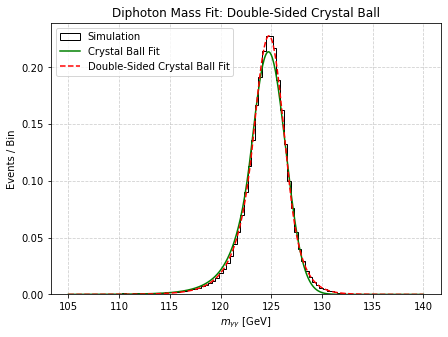

Double-Sided Crystal Ball Fit Parameters:
A = 0.227, μ = 124.77 GeV, σ = 1.55 GeV
Left Tail: α_L = 1.00, n_L = 26.29
Right Tail: α_R = 1.36, n_R = 148.91


In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define Double-Sided Crystal Ball (DSCB) function
def double_sided_crystal_ball(x, A, mu, sigma, alpha_L, n_L, alpha_R, n_R):
    """
    Double-Sided Crystal Ball Function
    - A: Amplitude
    - mu: Mean (center)
    - sigma: Width (Gaussian core)
    - alpha_L: Transition point for left tail
    - n_L: Power-law exponent for left tail
    - alpha_R: Transition point for right tail
    - n_R: Power-law exponent for right tail
    """
    z = (x - mu) / sigma
    abs_alpha_L = abs(alpha_L)
    abs_alpha_R = abs(alpha_R)

    if isinstance(z, np.ndarray):
        cb = np.zeros_like(z)

        # Gaussian core
        mask_core = (z > -abs_alpha_L) & (z < abs_alpha_R)
        cb[mask_core] = np.exp(-0.5 * z[mask_core]**2)

        # Left tail (power-law)
        mask_left = z <= -abs_alpha_L
        cb[mask_left] = (n_L / abs_alpha_L) ** n_L * np.exp(-0.5 * abs_alpha_L**2) / \
                        ((n_L / abs_alpha_L - abs_alpha_L - z[mask_left]) ** n_L)

        # Right tail (power-law)
        mask_right = z >= abs_alpha_R
        cb[mask_right] = (n_R / abs_alpha_R) ** n_R * np.exp(-0.5 * abs_alpha_R**2) / \
                         ((n_R / abs_alpha_R - abs_alpha_R + z[mask_right]) ** n_R)

        return A * cb
    else:
        if -abs_alpha_L < z < abs_alpha_R:
            return A * np.exp(-0.5 * z**2)
        elif z <= -abs_alpha_L:
            return A * (n_L / abs_alpha_L) ** n_L * np.exp(-0.5 * abs_alpha_L**2) / ((n_L / abs_alpha_L - abs_alpha_L - z) ** n_L)
        else:  # z >= abs_alpha_R
            return A * (n_R / abs_alpha_R) ** n_R * np.exp(-0.5 * abs_alpha_R**2) / ((n_R / abs_alpha_R - abs_alpha_R + z) ** n_R)

# Create histogram
bins = np.linspace(105, 140, 100)  # Adjust as needed
hist, bin_edges = np.histogram(diphoton_mass_np, bins=bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin centers

# Fit Double-Sided Crystal Ball
p0_dscb = [max(hist), 125, 2, 1.5, 5, 1.5, 5]  # Initial guesses: A, mu, sigma, alpha_L, n_L, alpha_R, n_R
params_dscb, _ = curve_fit(double_sided_crystal_ball, bin_centers, hist, p0=p0_dscb)

# Generate fitted curve
x_fit = np.linspace(105, 140, 500)
y_dscb = double_sided_crystal_ball(x_fit, *params_dscb)

# Plot histogram
plt.figure(figsize=(7, 5))
plt.hist(diphoton_mass_np, bins=bins, density=True, histtype="step", color="black", label="Simulation")

# Plot Gaussian fit
# plt.plot(x_fit, y_gaussian, color="blue", linestyle="-", label=r"Gaussian Fit: $A e^{-(x-\mu)^2 / 2\sigma^2}$")

# Plot Crystal Ball fit
plt.plot(x_fit, y_cb, color="green", linestyle="-", label=r"Crystal Ball Fit")

# Plot DSCB fit
plt.plot(x_fit, y_dscb, color="red", linestyle="--", label="Double-Sided Crystal Ball Fit")

# Labels and formatting
plt.xlabel(r"$m_{\gamma\gamma}$ [GeV]")
plt.ylabel("Events / Bin")
plt.legend()
plt.title("Diphoton Mass Fit: Double-Sided Crystal Ball")
plt.grid(True, linestyle="--", alpha=0.6)

# Save the plot
plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/comparison_fitting_ttHToGG_fitting_DSCB.pdf")
plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/comparison_fitting_ttHToGG_fitting_DSCB.png")
plt.show()

# Print fit parameters
print(f"Double-Sided Crystal Ball Fit Parameters:")
print(f"A = {params_dscb[0]:.3f}, μ = {params_dscb[1]:.2f} GeV, σ = {params_dscb[2]:.2f} GeV")
print(f"Left Tail: α_L = {params_dscb[3]:.2f}, n_L = {params_dscb[4]:.2f}")
print(f"Right Tail: α_R = {params_dscb[5]:.2f}, n_R = {params_dscb[6]:.2f}")


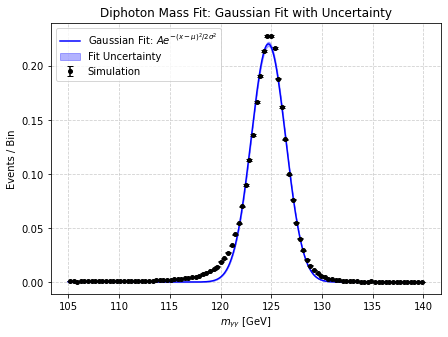

Gaussian Fit Parameters:
  A = 0.220 ± 0.002
  μ = 124.72 ± 0.02 GeV
  σ = 1.69 ± 0.02 GeV


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define Gaussian function
def gaussian(x, A, mu, sigma):
    return A * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Define Exponential function (for comparison)
def exp_fit(x, A, B):
    return A * np.exp(-B * x)

# Create histogram
bins = np.linspace(105, 140, 100)  # Adjust as needed
hist, bin_edges = np.histogram(diphoton_mass_np, bins=bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin centers
bin_width = bin_edges[1] - bin_edges[0]

# Calculate Poisson errors
hist_errors = np.sqrt(hist) / np.sqrt(len(diphoton_mass_np))  # Normalized Poisson errors

# Fit Gaussian to histogram data
p0_gaussian = [max(hist), 125, 2]  # Initial guesses: peak height, mean (125 GeV), width
params_gaussian, covariance_gaussian = curve_fit(gaussian, bin_centers, hist, p0=p0_gaussian)

# Compute uncertainty band for Gaussian fit
param_errors = np.sqrt(np.diag(covariance_gaussian))
x_fit = np.linspace(105, 140, 500)
y_gaussian = gaussian(x_fit, *params_gaussian)

# Generate confidence interval band (propagating uncertainty in parameters)
A_err, mu_err, sigma_err = param_errors
y_gaussian_upper = gaussian(x_fit, params_gaussian[0] + A_err, params_gaussian[1], params_gaussian[2])
y_gaussian_lower = gaussian(x_fit, params_gaussian[0] - A_err, params_gaussian[1], params_gaussian[2])

# Plot histogram with error bars
plt.figure(figsize=(7, 5))
plt.errorbar(bin_centers, hist, yerr=hist_errors, fmt="o", color="black", label="Simulation", markersize=4, capsize=3)

# Plot Gaussian fit
plt.plot(x_fit, y_gaussian, color="blue", linestyle="-", label=r"Gaussian Fit: $A e^{-(x-\mu)^2 / 2\sigma^2}$")

# Plot uncertainty band
plt.fill_between(x_fit, y_gaussian_lower, y_gaussian_upper, color="blue", alpha=0.3, label="Fit Uncertainty")

# Labels and formatting
plt.xlabel(r"$m_{\gamma\gamma}$ [GeV]")
plt.ylabel("Events / Bin")
plt.legend()
plt.title("Diphoton Mass Fit: Gaussian Fit with Uncertainty")
plt.grid(True, linestyle="--", alpha=0.6)

# plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_ttHToGG_with_uncertainty.pdf")
# plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_ttHToGG_with_uncertainty.png")
plt.show()

# Print Gaussian fit parameters with uncertainties
print(f"Gaussian Fit Parameters:")
print(f"  A = {params_gaussian[0]:.3f} ± {A_err:.3f}")
print(f"  μ = {params_gaussian[1]:.2f} ± {mu_err:.2f} GeV")
print(f"  σ = {params_gaussian[2]:.2f} ± {sigma_err:.2f} GeV")


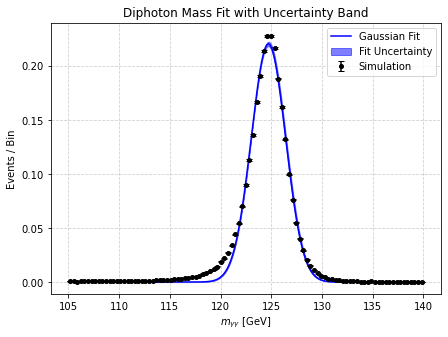

Gaussian Fit Parameters:
  A = 0.220 ± 0.002
  μ = 124.72 ± 0.02 GeV
  σ = 1.69 ± 0.02 GeV


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define Gaussian function
def gaussian(x, A, mu, sigma):
    return A * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Create histogram
bins = np.linspace(105, 140, 100)
hist, bin_edges = np.histogram(diphoton_mass_np, bins=bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  
bin_width = bin_edges[1] - bin_edges[0]

# Poisson errors
hist_errors = np.sqrt(hist) / np.sqrt(len(diphoton_mass_np))

# Fit Gaussian
p0_gaussian = [max(hist), 125, 2]
params_gaussian, covariance_gaussian = curve_fit(gaussian, bin_centers, hist, p0=p0_gaussian)

# Get parameter errors
param_errors = np.sqrt(np.diag(covariance_gaussian))
A_err, mu_err, sigma_err = param_errors
A_fit, mu_fit, sigma_fit = params_gaussian

# Generate fitted Gaussian curve
x_fit = np.linspace(105, 140, 500)
y_fit = gaussian(x_fit, A_fit, mu_fit, sigma_fit)

# Generate upper and lower uncertainty bounds
y_fit_upper = gaussian(x_fit, A_fit + A_err, mu_fit + mu_err, sigma_fit + sigma_err)
y_fit_lower = gaussian(x_fit, A_fit - A_err, mu_fit - mu_err, sigma_fit - sigma_err)

# Plot histogram with error bars
plt.figure(figsize=(7, 5))
plt.errorbar(bin_centers, hist, yerr=hist_errors, fmt="o", color="black", label="Simulation", markersize=4, capsize=3)

# Plot Gaussian fit
plt.plot(x_fit, y_fit, color="blue", linestyle="-", label="Gaussian Fit")

# Plot uncertainty band
plt.fill_between(x_fit, y_fit_lower, y_fit_upper, color="blue", alpha=0.5, label="Fit Uncertainty")

# Labels and formatting
plt.xlabel(r"$m_{\gamma\gamma}$ [GeV]")
plt.ylabel("Events / Bin")
plt.legend()
plt.title("Diphoton Mass Fit with Uncertainty Band")
plt.grid(True, linestyle="--", alpha=0.6)

# plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_ttHToGG_uncertainty.pdf")
# plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_ttHToGG_uncertainty.png")
plt.show()

# Print Gaussian fit parameters with uncertainties
print(f"Gaussian Fit Parameters:")
print(f"  A = {A_fit:.3f} ± {A_err:.3f}")
print(f"  μ = {mu_fit:.2f} ± {mu_err:.2f} GeV")
print(f"  σ = {sigma_fit:.2f} ± {sigma_err:.2f} GeV")


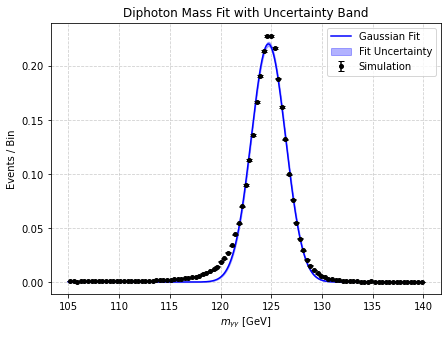

Gaussian Fit Parameters:
  A = 0.220 ± 0.002
  μ = 124.72 ± 0.02 GeV
  σ = 1.69 ± 0.02 GeV


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define Gaussian function
def gaussian(x, A, mu, sigma):
    return A * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Create histogram
bins = np.linspace(105, 140, 100)
hist, bin_edges = np.histogram(diphoton_mass_np, bins=bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  
bin_width = bin_edges[1] - bin_edges[0]

# Poisson errors
hist_errors = np.sqrt(hist) / np.sqrt(len(diphoton_mass_np))

# Fit Gaussian
p0_gaussian = [max(hist), 125, 2]
params_gaussian, covariance_gaussian = curve_fit(gaussian, bin_centers, hist, p0=p0_gaussian)

# Get parameter errors
param_errors = np.sqrt(np.diag(covariance_gaussian))
A_err, mu_err, sigma_err = param_errors
A_fit, mu_fit, sigma_fit = params_gaussian

# Generate fitted Gaussian curve
x_fit = np.linspace(105, 140, 500)
y_fit = gaussian(x_fit, A_fit, mu_fit, sigma_fit)

# Monte Carlo Sampling for Uncertainty Band
n_samples = 1000  # Number of MC samples
y_samples = np.zeros((n_samples, len(x_fit)))

for i in range(n_samples):
    A_sample = np.random.normal(A_fit, A_err)
    mu_sample = np.random.normal(mu_fit, mu_err)
    sigma_sample = np.random.normal(sigma_fit, sigma_err)
    y_samples[i, :] = gaussian(x_fit, A_sample, mu_sample, sigma_sample)

y_fit_lower = np.percentile(y_samples, 16, axis=0)  # 1 sigma lower bound
y_fit_upper = np.percentile(y_samples, 84, axis=0)  # 1 sigma upper bound

# Plot histogram with error bars
plt.figure(figsize=(7, 5))
plt.errorbar(bin_centers, hist, yerr=hist_errors, fmt="o", color="black", label="Simulation", markersize=4, capsize=3)

# Plot Gaussian fit
plt.plot(x_fit, y_fit, color="blue", linestyle="-", label="Gaussian Fit")

# Plot uncertainty band
plt.fill_between(x_fit, y_fit_lower, y_fit_upper, color="blue", alpha=0.3, label="Fit Uncertainty")

# Labels and formatting
plt.xlabel(r"$m_{\gamma\gamma}$ [GeV]")
plt.ylabel("Events / Bin")
plt.legend()
plt.title("Diphoton Mass Fit with Uncertainty Band")
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()

# Print Gaussian fit parameters with uncertainties
print(f"Gaussian Fit Parameters:")
print(f"  A = {A_fit:.3f} ± {A_err:.3f}")
print(f"  μ = {mu_fit:.2f} ± {mu_err:.2f} GeV")
print(f"  σ = {sigma_fit:.2f} ± {sigma_err:.2f} GeV")
